<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°07

**Objetivo**: Aplicar técnicas básicas de **Machine Learning** (tanto regresión como clasificación), desde la preparación de datos hasta el entrenamiento y evaluación de modelos.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.



## Regresión


<img src="https://cdn-icons-png.flaticon.com/512/2400/2400362.png" width = "300" align="center"/>


Los datos utilizados corresponden a propiedades localizadas en un distrito específico de California, junto con algunas estadísticas resumen extraídas del censo de 1990. Es importante tener en cuenta que los datos no han sido procesados previamente, por lo que será necesario realizar algunas etapas de limpieza y preprocesamiento.

Las columnas incluidas en el conjunto de datos son las siguientes (sus nombres son descriptivos):

* **longitude**: Longitud geográfica de la propiedad.
* **latitude**: Latitud geográfica de la propiedad.
* **housingmedianage**: Edad media de las viviendas en la zona.
* **total_rooms**: Número total de habitaciones.
* **total_bedrooms**: Número total de dormitorios.
* **population**: Población en el área circundante.
* **households**: Número de hogares en la zona.
* **median_income**: Ingreso medio por hogar.
* **medianhousevalue**: Valor medio de la propiedad.
* **ocean_proximity**: Proximidad al océano.

El objetivo de este análisis es predecir el valor medio de las propiedades utilizando las características proporcionadas.

Para completar este laboratorio, se recomienda seguir la siguiente rúbrica de trabajo:

1. **Definición del problema**: Clarificar el objetivo del análisis y los resultados esperados.
2. **Estadística descriptiva**: Resumir las principales características de los datos a través de medidas estadísticas.
3. **Visualización descriptiva**: Utilizar gráficos para explorar los datos y sus relaciones.
4. **Preprocesamiento**: Realizar los pasos necesarios de limpieza y transformación de los datos.
5. **Selección de modelo**: Comparar al menos cuatro modelos de predicción diferentes.
6. **Métricas y análisis de resultados**: Evaluar el rendimiento de los modelos utilizando métricas apropiadas.
7. **Visualización de resultados del modelo**: Crear gráficos que muestren el desempeño de los modelos.
8. **Conclusiones**: Resumir los hallazgos del análisis.

> **Nota**: Se anima a los estudiantes a desarrollar un análisis más profundo si lo desean. Pueden consultar como referencia el siguiente [enlace](https://www.kaggle.com/camnugent/california-housing-prices).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [3]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


1.Definición del problema: Clarificar el objetivo del análisis y los resultados esperados.

Este problema es un dataset usado en el segundo capitulo del libro de Aurélien Géron's Aprendizaje automatico practico con Scikit-Learn y TensorFlow. Esto sirve como una excelente introduccion a la implementacion de algoritmos de machine learning, pues se requiere una limpieza rudimentaria de los datos, cuenta con una lista de variables fácilmente comprensible y su tamaño óptimo es el ideal.

La data contiene informacion del censo de california en 1990. Entonces quizas no ayude con la prediccion reciente de precios de alojamientos como el dataset de Zillow Zestimate, el cual si proporciona un dataset introductorio accesible para enseñar a la gente sobre lo basico de machine learning.

In [4]:
#2.Estadística descriptiva: Resumir las principales características de los datos a través de medidas estadísticas
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


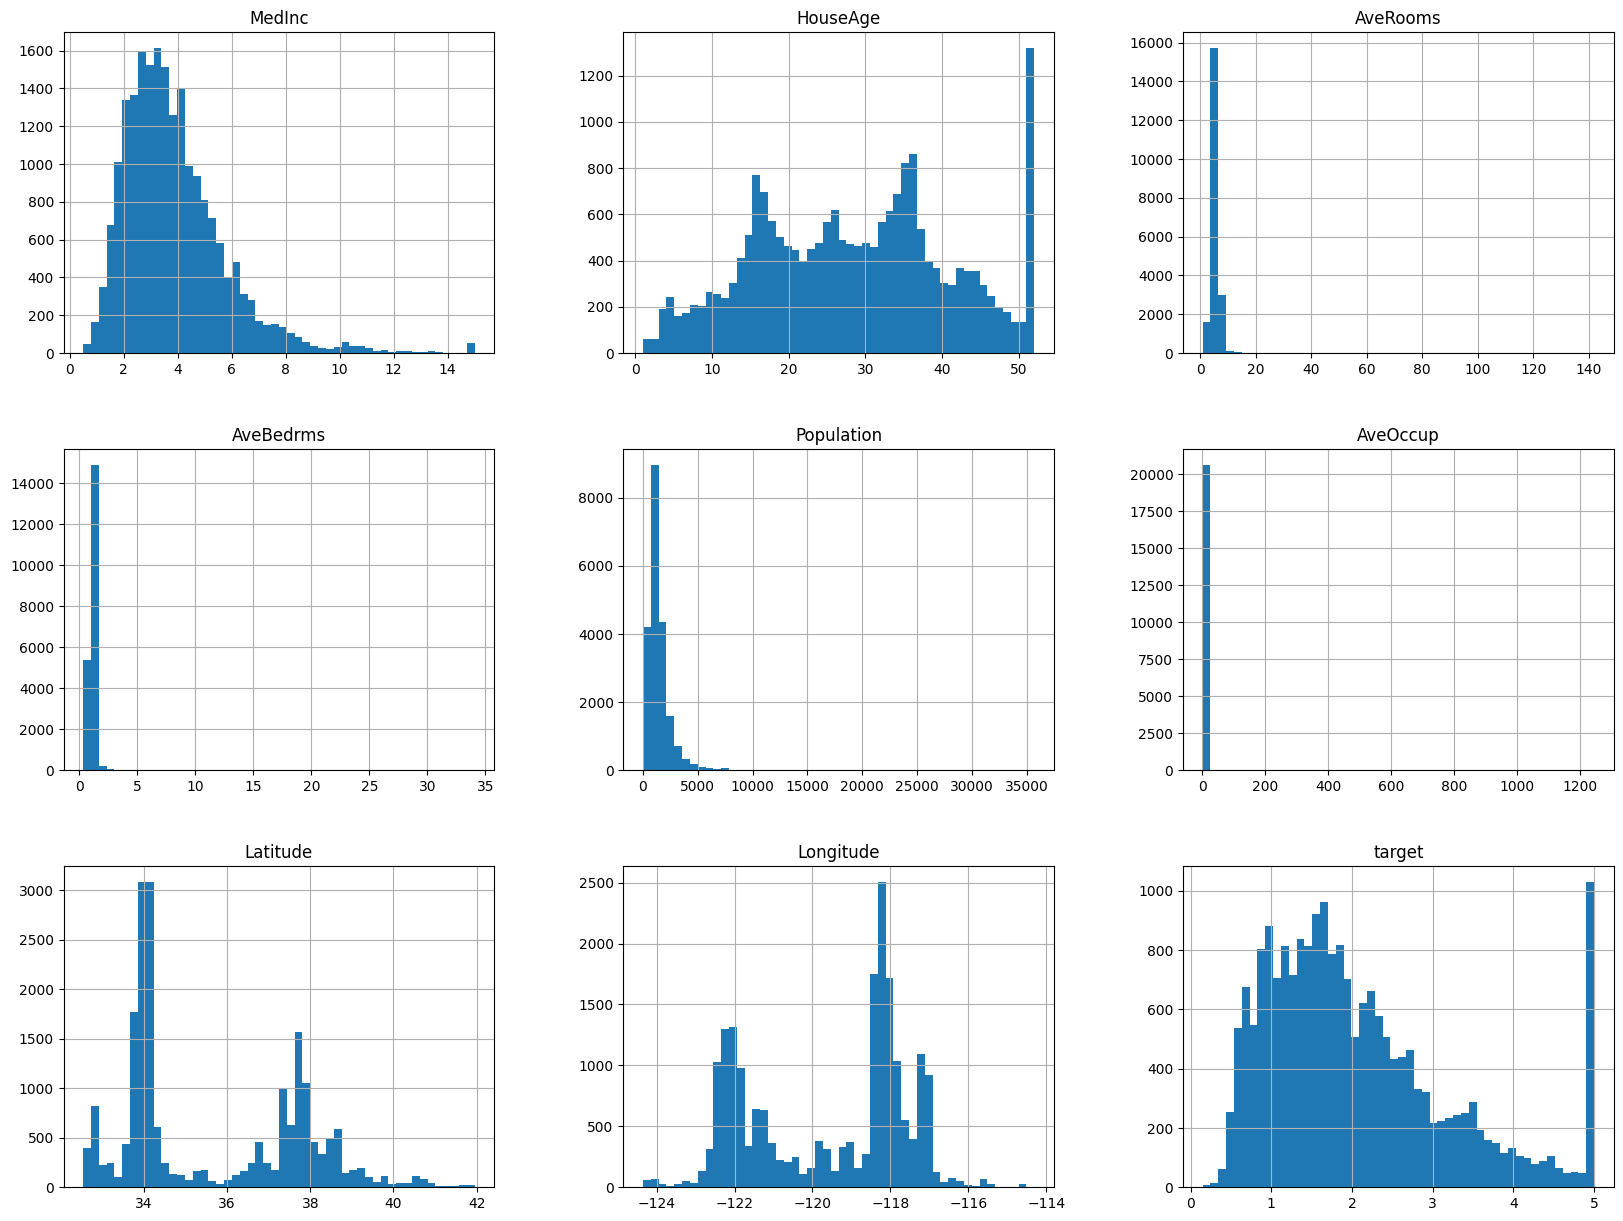

In [5]:
#3.Visualización descriptiva: Utilizar gráficos para explorar los datos y sus relaciones
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
#4.Preprocesamiento: Realizar los pasos necesarios de limpieza y transformación de los datos
from sklearn.preprocessing import StandardScaler

housing.isnull().sum()
housing.replace([np.inf, -np.inf], np.nan, inplace=True)#rellenar datos NaN por 0
housing.fillna(0, inplace=True)

escalar= StandardScaler()
caract= housing.drop("target", axis=1)
target= housing["target"]

escalar_caract= escalar.fit_transform(caract)
escalar_housing= pd.DataFrame(escalar_caract, columns=caract.columns)
escalar_housing["target"] = target.values
display(escalar_housing.head())
display(escalar_housing.describe())


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,4.526
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,3.585
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,3.521
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,3.413
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,3.422


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,20640.000000
mean,6.609700e-17,5.508083e-18,6.609700e-17,-1.060306e-16,-1.101617e-17,3.442552e-18,-1.079584e-15,-8.526513e-15,2.068558
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.153956
min,-1.774299e+00,-2.196180e+00,-1.852319e+00,-1.610768e+00,-1.256123e+00,-2.290000e-01,-1.447568e+00,-2.385992e+00,0.149990
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01,-1.911716e-01,-5.638089e-01,-6.171062e-02,-7.967887e-01,-1.113209e+00,1.196000
50%,-1.767951e-01,2.864572e-02,-8.078489e-02,-1.010650e-01,-2.291318e-01,-2.431585e-02,-6.422871e-01,5.389137e-01,1.797000
75%,4.593063e-01,6.643103e-01,2.519615e-01,6.015869e-03,2.644949e-01,2.037453e-02,9.729566e-01,7.784964e-01,2.647250
max,5.858286e+00,1.856182e+00,5.516324e+01,6.957171e+01,3.025033e+01,1.194191e+02,2.958068e+00,2.625280e+00,5.000010


In [7]:
#5.Selección de modelo: Comparar al menos cuatro modelos de predicción diferentes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

x= escalar_housing.drop(columns="target").values
y= escalar_housing["target"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

modelos={
    "regresion_lineal": LinearRegression(),
    "arbol_decision": DecisionTreeRegressor(),
    "random_forest": RandomForestRegressor(),
    "KNN": KNeighborsRegressor()
}
predicciones={}
for nombre, modelo in modelos.items():
    modelo.fit(x_train, y_train)
    predicciones[nombre] = modelo.predict(x_test)

def metricas(y_test, y_pred):
    mae= mean_absolute_error(y_test, y_pred)
    mse= mean_squared_error(y_test, y_pred)
    rmse= np.sqrt(mse)
    mape= np.mean(np.abs((y_test - y_pred) / y_test))*100
    r2 = r2_score(y_test, y_pred)
    return {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape,
        'R²': r2,
    }

resultados= pd.DataFrame({nombre: metricas(y_test, y_pred) for nombre, y_pred in predicciones.items()}).T
resultados= resultados.reset_index().rename(columns={'index': 'Modelo'})

display(resultados)

,Modelo,MAE,MSE,RMSE,MAPE,R²
0,regresion_lineal,0.533200,0.555892,0.745581,31.952187,0.575788
1,arbol_decision,0.452690,0.491629,0.701163,24.986619,0.624828
2,random_forest,0.326807,0.254443,0.504423,18.875270,0.805830
3,KNN,0.445525,0.433811,0.658643,24.629896,0.668950


6.Métricas y análisis de resultados: Evaluar el rendimiento de los modelos utilizando métricas apropiadas

Dada la tabla generada en el punto $5$, se observa que el **random forest** tiene el **MAE** **más bajo** de todos los modelos, con un MAE de $0.328420$, es decir, sus predicciones son muy cercanas al valor real.

Para **MSE** y **RMSE** **random forest** tiene los valores **más pequeños**, $0.255268$ y	$0.505240$ respectivamente, por tanto se garantiza una precision global de las predicciones.

Nuevamente, para **MAPE**, **random forest** tiene el **porcentaje mas bajo de error** con un $18.9\%$ aproximadamente, por tanto el modelo es muy bueno en comparacion a los demas.

Finalmente, con un $R^2=0.805200$ el cual es muy cercano a $1$, se observa que **random forest** es el mejor modelo de los $4$, pues es el que tiene errores mas bajos de los cuatro modelos y una **capacidad descriptiva** del modelo **muy alta**.

De los otros modelos se puede decir que le siguen KNN, arbol_decision y regresion_lineal, en ese orden, siendo KNN un buen modelo pero no tan bueno como random forest, luego arbol_decision tambien es un buen modelo pero con algunas cifras mas que delatan una peor prediccion con mas datos; y para regresion_lineal tiene un $R^2$ que es casi mejor tirar una moneda y que salga al azar, por tanto no representa un buen modelo para predecir en este caso.

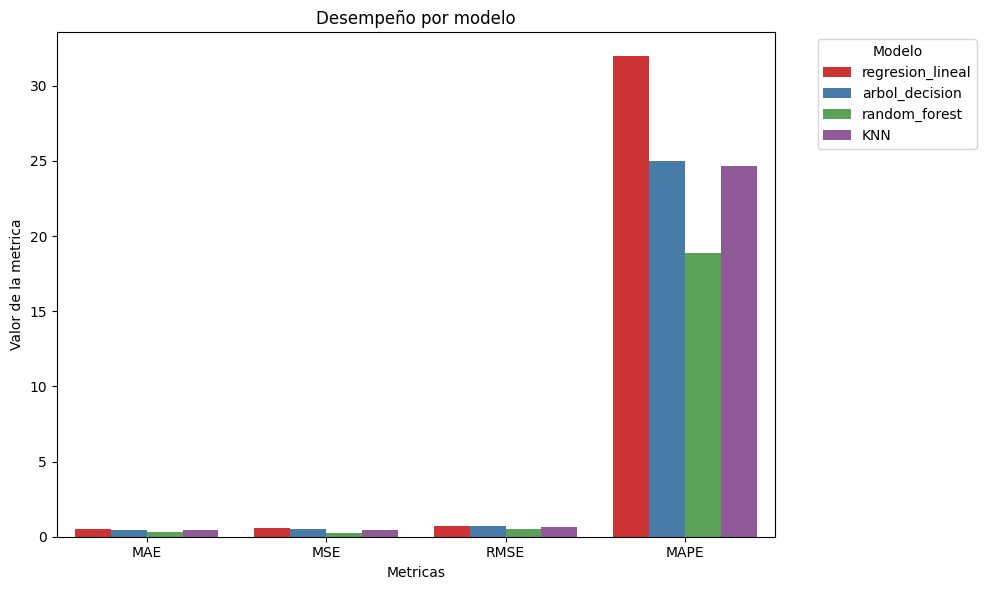

/tmp/ipython-input-3762962386.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='R²', data=resultados, palette='Set1')


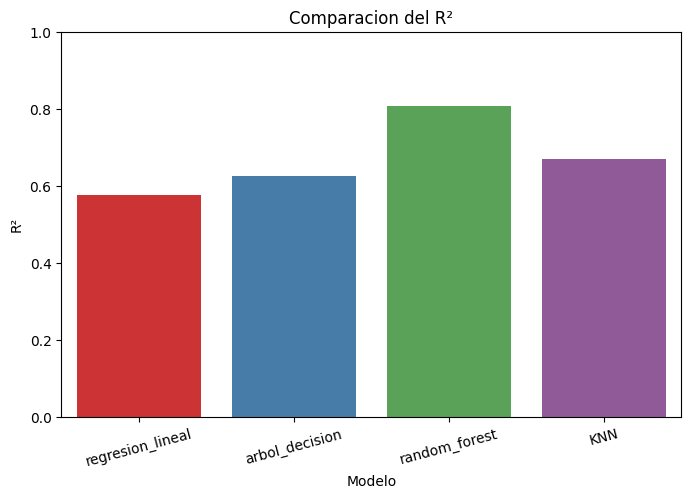

In [8]:
#7.Visualización de resultados del modelo: Crear gráficos que muestren el desempeño de los modelos.
metricas_error= ['MAE', 'MSE', 'RMSE', 'MAPE']

resultados_error= resultados.melt(
    id_vars='Modelo',
    value_vars=metricas_error,
    var_name='Metrica',
    value_name='Valor'
)

plt.figure(figsize=(10,6))
sns.barplot(x='Metrica', y='Valor', hue='Modelo', data=resultados_error, palette='Set1')
plt.title('Desempeño por modelo')
plt.ylabel('Valor de la metrica')
plt.xlabel('Metricas')
plt.legend(title='Modelo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='Modelo', y='R²', data=resultados, palette='Set1')
plt.title('Comparacion del R²')
plt.ylabel('R²')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.show()


8.Conclusiones: Resumir los hallazgos del análisis.

Como se mencionó en el punto 6 y como se puede verificar mediante los graficos, **random forest** es el **mejor modelo** de los cuatro modelos, pues posee la **mejor/mayor capacidad predictiva** ($R^2$ muy cercano a $1$), tiene los **errores mas bajos** (MAE, MSE y MAPE), por tanto es el mejor modelo para predecir en este dataset.

Por otro lado, el **arbol de decision** y **KNN** fueron los segundos mejores, con errores bajos muy parecidos,  y una capacidad predictiva buena, sin embargo para la **regresion lineal**, se tiene un $R^2=0.575788$ que casi nos dice que **es mejor dejarlo al azar**, por tanto, en comparacion con los demas modelos este **es el peor**, con una **mala capacidad predictiva** y **errores muy altos** como para considerarlo un buen modelo para este dataset.


## Clasificación


<img src="https://miro.medium.com/v2/resize:fit:372/0*EwdH1C6ThmpwY0Qo.png" width = "400" align="center"/>

El objetivo de este proyecto es realizar la mejor predicción posible de las imágenes a partir de los datos disponibles. Para lograrlo, es necesario seguir los pasos habituales en un proyecto de _Machine Learning_, que incluyen la exploración estadística, la visualización y el preprocesamiento de los datos.

Se solicita lo siguiente:

* Ajustar al menos tres modelos de clasificación:
    * Regresión logística.
    * K-Nearest Neighbors.
    * Un algoritmo adicional o más, de libre elección. Puedes consultar [esta lista de algoritmos](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) para obtener ideas.
  
* Realizar predicciones con cada uno de los tres modelos utilizando el conjunto de datos de _test_ y calcular sus respectivas puntuaciones (_score_).

* Evaluar y analizar los resultados de los modelos utilizando las siguientes métricas de rendimiento:
    * **Accuracy**
    * **Precision**
    * **Recall**
    * **F1-score**

### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [9]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [11]:
# informacion de las columnas
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [12]:
# informacion del target
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

In [13]:
#Ajustar al menos tres modelos de clasificación
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

x= digits_dict["data"]
y= digits_dict["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
escalar= StandardScaler()
x_train_escalar= escalar.fit_transform(x_train)
x_test_escalar= escalar.transform(x_test)

logreg= LogisticRegression(max_iter=5000, solver='lbfgs', multi_class='auto')
knn= KNeighborsClassifier()
arbol_decision= DecisionTreeClassifier()

logreg.fit(x_train_escalar, y_train)
knn.fit(x_train_escalar, y_train)
arbol_decision.fit(x_train_escalar, y_train)

#Realizar predicciones con cada uno de los tres modelos utilizando el conjunto de datos de test y calcular sus respectivas puntuaciones (score).
score_log= logreg.score(x_test_escalar, y_test)
score_knn= knn.score(x_test_escalar, y_test)
score_tree= arbol_decision.score(x_test_escalar, y_test)

model_scores= pd.DataFrame({
    'Modelo': ['Regresión Logística', 'KNN', 'Árbol de Decisión'],
    'Accuracy': [score_log, score_knn, score_tree]
})

print(model_scores)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


                Modelo  Accuracy
0  Regresión Logística  0.972222
1                  KNN  0.975000
2    Árbol de Decisión  0.847222


In [14]:
#Evaluar y analizar los resultados de los modelos utilizando las siguientes métricas de rendimiento:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred_log = logreg.predict(x_test_escalar)
y_pred_knn = knn.predict(x_test_escalar)
y_pred_tree = arbol_decision.predict(x_test_escalar)

def metricas_clasificacion(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1-score': f1_score(y_true, y_pred, average='weighted')
    }
metricas_log = metricas_clasificacion(y_test, y_pred_log)
metricas_knn = metricas_clasificacion(y_test, y_pred_knn)
metricas_tree = metricas_clasificacion(y_test, y_pred_tree)

metricas_df = pd.DataFrame([
    {'Modelo': 'Regresión Logística', **metricas_log},
    {'Modelo': 'KNN', **metricas_knn},
    {'Modelo': 'Árbol de Decisión', **metricas_tree}
])

display(metricas_df)

,Modelo,Accuracy,Precision,Recall,F1-score
0,Regresión Logística,0.972222,0.972521,0.972222,0.972296
1,KNN,0.975000,0.975015,0.975000,0.974780
2,Árbol de Decisión,0.847222,0.854245,0.847222,0.847721


A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [15]:
# leer datos
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [16]:
#¿Cómo se distribuyen los datos?
digits.describe()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


La mayoria de los datos se distribuyen con valores muy bajos, cercanos a cero o cero y pocos valores altos, es decir, varios valores representan pixeles en blanco, por tanto estan biene escalados, bien distribuidos.

In [17]:
#¿Cuánta memoria estoy utilizando?
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int64
 1   c01     1797 non-null   int64
 2   c02     1797 non-null   int64
 3   c03     1797 non-null   int64
 4   c04     1797 non-null   int64
 5   c05     1797 non-null   int64
 6   c06     1797 non-null   int64
 7   c07     1797 non-null   int64
 8   c08     1797 non-null   int64
 9   c09     1797 non-null   int64
 10  c10     1797 non-null   int64
 11  c11     1797 non-null   int64
 12  c12     1797 non-null   int64
 13  c13     1797 non-null   int64
 14  c14     1797 non-null   int64
 15  c15     1797 non-null   int64
 16  c16     1797 non-null   int64
 17  c17     1797 non-null   int64
 18  c18     1797 non-null   int64
 19  c19     1797 non-null   int64
 20  c20     1797 non-null   int64
 21  c21     1797 non-null   int64
 22  c22     1797 non-null   int64
 23  c23     1797 

Se esta utilizando un total de $912.7$KB de memoria

In [18]:
#¿Qué tipo de datos son?
digits.dtypes

,0
c00,int64
c01,int64
c02,int64
c03,int64
c04,int64
...,...
c60,int64
c61,int64
c62,int64
c63,int64


Los datos son tipo numeros enteros.

In [19]:
#¿Cuántos registros por clase hay?
digits["target"].value_counts()

,count
target,
3,183
1,182
5,182
4,181
6,181
9,180
7,179
0,178
2,177


entre las $10$ clases hay entre $174$ y $183$ registros.

In [20]:
#¿Hay registros que no se correspondan con tu conocimiento previo de los datos?
digits.isnull().sum()

,0
c00,0
c01,0
c02,0
c03,0
c04,0
...,...
c60,0
c61,0
c62,0
c63,0


No hay registros que no se correspondan, no hay valores nulos o faltantes.

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [21]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`.

> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

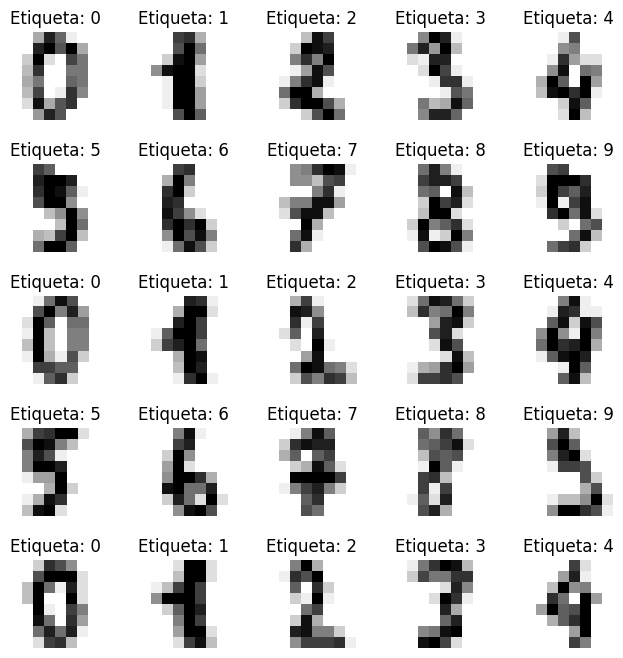

In [22]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(8, 8))
plt.subplots_adjust(hspace=0.5)

for i in range(nx):
    for j in range(ny):
        index = i * ny + j
        axs[i, j].imshow(digits_dict["images"][index], cmap="gray_r")
        axs[i, j].set_title(f"Etiqueta: {digits_dict['target'][index]}")
        axs[i, j].axis("off")

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test**
     * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
     * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
  
* **modelo**:
     * Instanciar el modelo objetivo desde la librería sklearn.

* **Métricas**:
     * Graficar matriz de confusión.
     * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [23]:
# features, target

X = digits.drop(columns="target").values
y = digits["target"].values

Largo del conjunto de entrenamiento: 1437
Largo del conjunto de testeo: 360


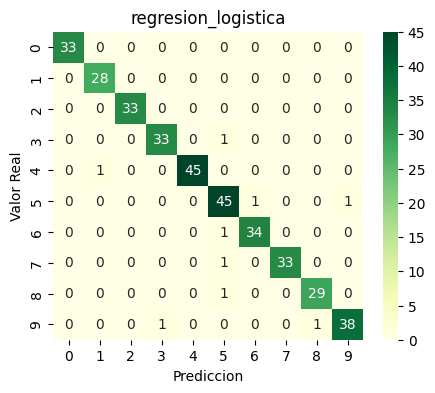


regresion_logistica
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.96      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.98       360

Accuracy: 0.9750
Tiempo de ejecucion: 1.9069


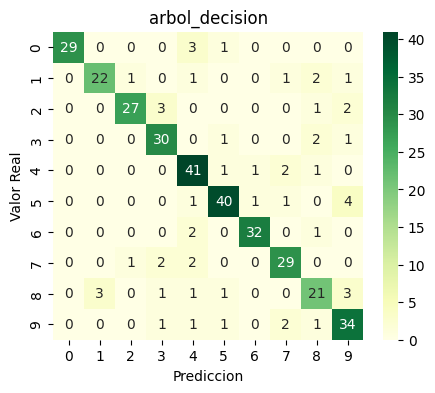


arbol_decision
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        33
           1       0.88      0.79      0.83        28
           2       0.93      0.82      0.87        33
           3       0.81      0.88      0.85        34
           4       0.79      0.89      0.84        46
           5       0.89      0.85      0.87        47
           6       0.94      0.91      0.93        35
           7       0.83      0.85      0.84        34
           8       0.72      0.70      0.71        30
           9       0.76      0.85      0.80        40

    accuracy                           0.85       360
   macro avg       0.85      0.84      0.85       360
weighted avg       0.85      0.85      0.85       360

Accuracy: 0.8472
Tiempo de ejecucion: 0.0250


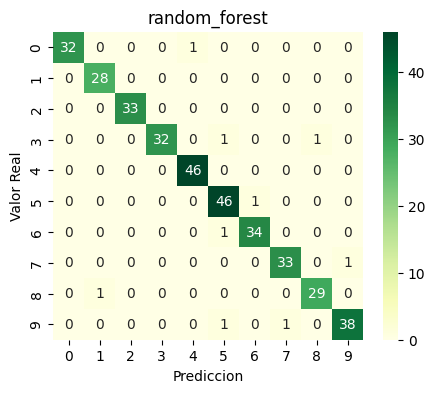


random_forest
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.98      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.98       360
weighted avg       0.98      0.97      0.97       360

Accuracy: 0.9750
Tiempo de ejecucion: 0.4113


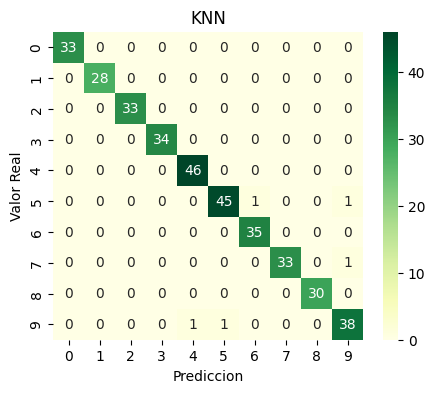


KNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

Accuracy: 0.9861
Tiempo de ejecucion: 0.0185


,Modelo,Accuracy,Tiempo
3,KNN,0.986111,0.018543
0,regresion_logistica,0.975000,1.906861
2,random_forest,0.975000,0.411347
1,arbol_decision,0.847222,0.025021


In [28]:
#train-test
#Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
#Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

print("Largo del conjunto de entrenamiento:", len(X_train))
print("Largo del conjunto de testeo:", len(X_test))

#modelo:Instanciar el modelo objetivo desde la librería sklearn.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
modelos={
    "regresion_logistica": LogisticRegression(max_iter=5000),
    "arbol_decision": DecisionTreeClassifier(),
    "random_forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

#Métricas: Graficar matriz de confusión y Analizar métricas de error.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import time

resultados = []

for nombre, modelo in modelos.items():
    inicio= time.time()
    modelo.fit(X_train, y_train)
    y_pred= modelo.predict(X_test)
    fin= time.time()
    tiempo_ejecucion= fin-inicio
    accuracy= accuracy_score(y_test, y_pred)
    resultados.append({
        "Modelo": nombre,
        "Accuracy": accuracy,
        "Tiempo": tiempo_ejecucion
        })

    #Graficar matriz de confusión
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="YlGn")
    plt.title(f"{nombre}")
    plt.xlabel("Prediccion")
    plt.ylabel("Valor Real")
    plt.show()

    #Analizar métricas de error
    print(f"\n{nombre}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Tiempo de ejecucion: {tiempo_ejecucion:.4f}")

df_resultados= pd.DataFrame(resultados).sort_values(by="Accuracy", ascending=False)
display(df_resultados)

¿Cuál modelo es mejor basado en sus métricas?

Segun las metricas usadas, el mejor modelo es KNN con una **exactitud muy grande** de $0.986111$ o de un $98\%$.

¿Cuál modelo demora menos tiempo en ajustarse?

El modelo que demora menos tiempo en ajustarse es KNN, con un tiempo de $0.018543$ segundos.

¿Qué modelo escoges?

Dado lo mencionado anteriormente, no solo tiene una exactitud muy grande, si no que el **tiempo de entrenamiento es el menor de todos** los modelos pasando al arbol de decision, por tanto se escoge el modelo **KNN**

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el **mejor modelo entontrado** en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:


 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

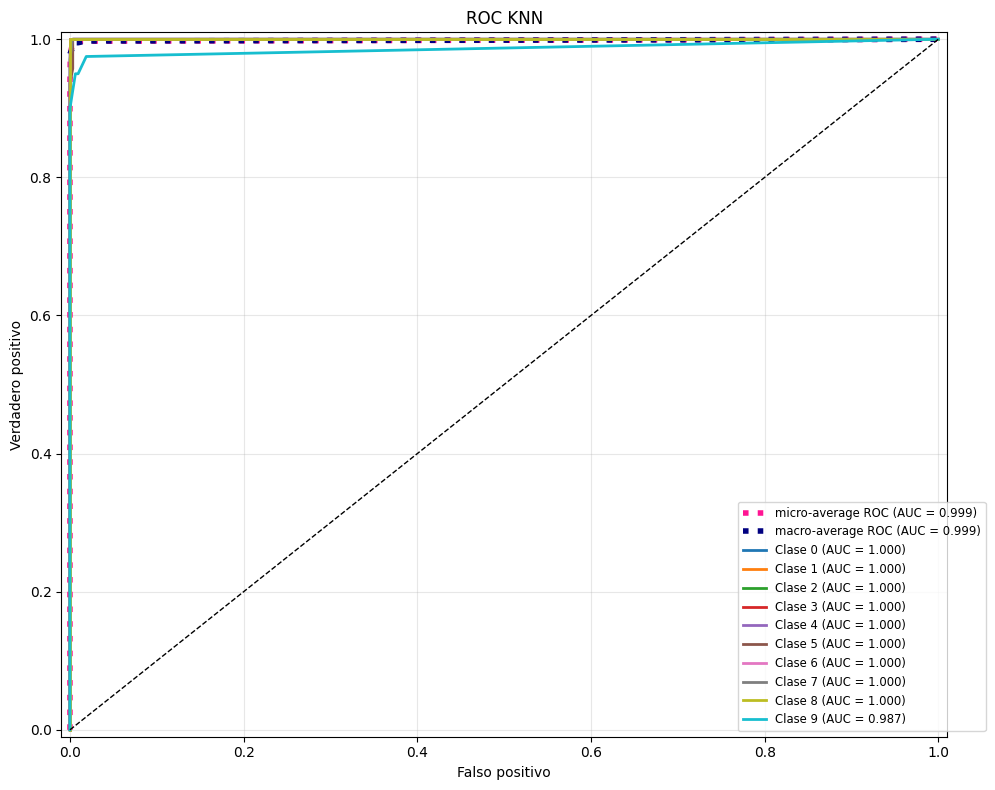

AUC por clase:
Clase 0: AUC = 1.0000
Clase 1: AUC = 1.0000
Clase 2: AUC = 1.0000
Clase 3: AUC = 1.0000
Clase 6: AUC = 1.0000
Clase 8: AUC = 1.0000
Clase 4: AUC = 1.0000
Clase 7: AUC = 1.0000
Clase 5: AUC = 0.9998
Clase 9: AUC = 0.9868

AUC micro-average: 0.9985
AUC macro-average: 0.9987


In [34]:
from itertools import cycle
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

X_train, X_test, y_train, y_test= train_test_split(
    X, y, test_size=0.2, random_state=42)
n_classes= len(np.unique(y))
y_test_binar= label_binarize(y_test, classes=np.arange(n_classes))

knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_score= knn.predict_proba(X_test)

FPR=dict()
TPR=dict()
roc_auc=dict()
for i in range(n_classes):
    FPR[i], TPR[i], _=roc_curve(y_test_binar[:, i], y_score[:, i])
    roc_auc[i] = auc(FPR[i], TPR[i])

FPR["micro"], TPR["micro"], _ = roc_curve(y_test_binar.ravel(), y_score.ravel())
roc_auc["micro"] = auc(FPR["micro"], TPR["micro"])
all_fpr = np.unique(np.concatenate([FPR[i] for i in range(n_classes)]))

promedio_TPR = np.zeros_like(all_fpr)
for i in range(n_classes):
    promedio_TPR += np.interp(all_fpr, FPR[i], TPR[i])
promedio_TPR /= n_classes

FPR["macro"] = all_fpr
TPR["macro"] = promedio_TPR
roc_auc["macro"] = auc(FPR["macro"], TPR["macro"])

plt.figure(figsize=(10, 8))
plt.plot(FPR["micro"], TPR["micro"],
         label=f'micro-average ROC (AUC = {roc_auc["micro"]:.3f})',
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(FPR["macro"], TPR["macro"],
         label=f'macro-average ROC (AUC = {roc_auc["macro"]:.3f})',
         color='navy', linestyle=':', linewidth=4)

colors= cycle(plt.cm.tab10.colors)
for i, color in zip(range(n_classes), colors):
    plt.plot(FPR[i], TPR[i], color=color, lw=2,
             label=f'Clase {i} (AUC = {roc_auc[i]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('Falso positivo')
plt.ylabel('Verdadero positivo')
plt.title('ROC KNN')
plt.legend(loc='lower right', bbox_to_anchor=(1.05, 0), fontsize='small')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

auc_per_class= {i: roc_auc[i] for i in range(n_classes)}
sorted_auc= dict(sorted(auc_per_class.items(), key=lambda kv: kv[1], reverse=True))
print("AUC por clase:")
for cls, val in sorted_auc.items():
    print(f"Clase {cls}: AUC = {val:.4f}")

print(f"\nAUC micro-average: {roc_auc['micro']:.4f}")
print(f"AUC macro-average: {roc_auc['macro']:.4f}")


Del grafico se puede confirmar que **el modelo KNN es el mejor modelo** para este dataset, pues todas las curvas estan sobre la recta diagonal (por mucho), quiere decir que **son mejores que dejarlo al azar**, ademas dado el AUC micro-average de $0.9985$ y AUC macro-average de $0.9987$ se tiene un redimiento excepcional para el modelo, con casi nada de error.



### Ejercicio 5


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_.

In [31]:
def mostrar_resultados(digits, model, nx=5, ny=5, label="correctos"):
    """
    Muestra los resultados de las predicciones de un modelo de clasificación en particular.
    Se toman aleatoriamente los valores de los resultados.

    - label == 'correctos': muestra los valores en los que el modelo acierta.
    - label == 'incorrectos': muestra los valores en los que el modelo no acierta.

    Observación: El modelo que se recibe como argumento no debe estar entrenado.

    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: número de filas (subplots)
    :param ny: número de columnas (subplots)
    :param label: 'correctos' o 'incorrectos'
    :return: gráficos matplotlib
    """

    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)  # Ajustar el modelo
    y_pred = model.predict(X_test)

    # Mostrar los datos correctos
    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"

    # Mostrar los datos incorrectos
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"

    else:
        raise ValueError("Valor incorrecto")

    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    n_samples = min(nx * ny, len(X_aux))
    indices = np.random.choice(len(X_aux), n_samples, replace=False)
    fig, ax = plt.subplots(nx, ny, figsize=(12, 12))

    for i, index in enumerate(indices):
        data = X_aux[index, :].reshape(8, 8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        row = i // ny
        col = i % ny
        ax[row, col].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[row, col].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
        ax[row, col].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)

    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

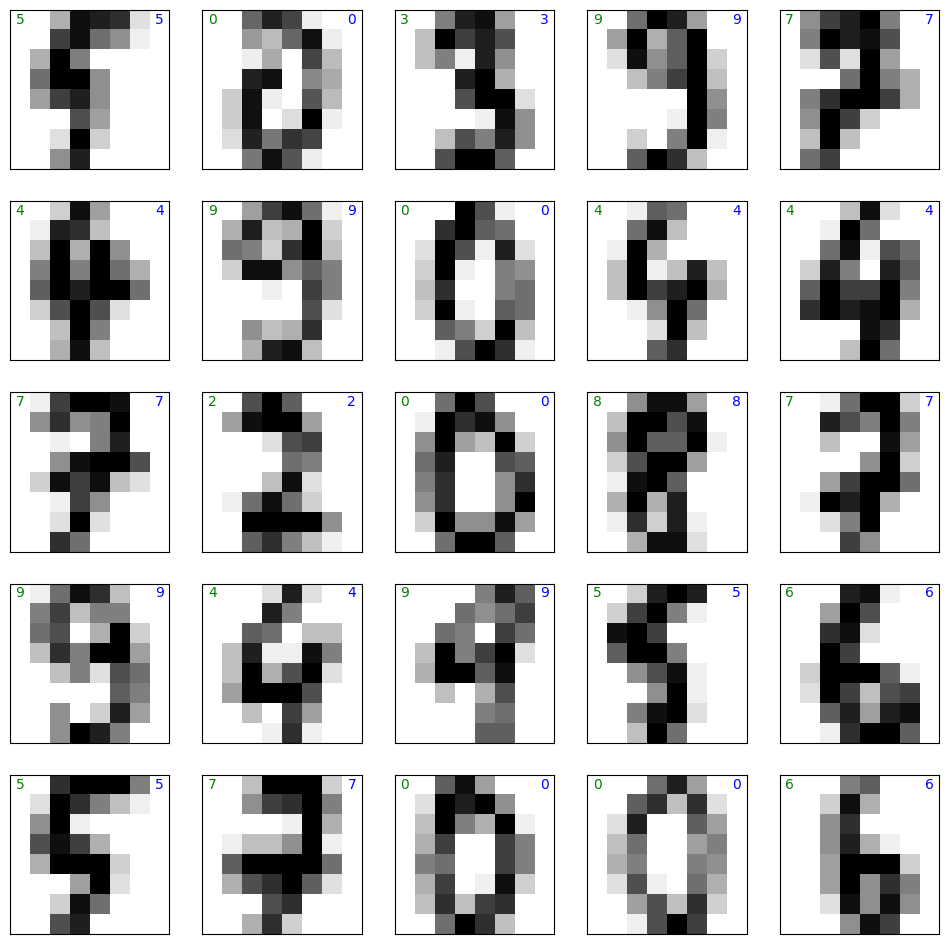

In [42]:
#el valor predicho y original son iguales
mostrar_resultados(digits, knn, nx=5, ny=5, label="correctos")

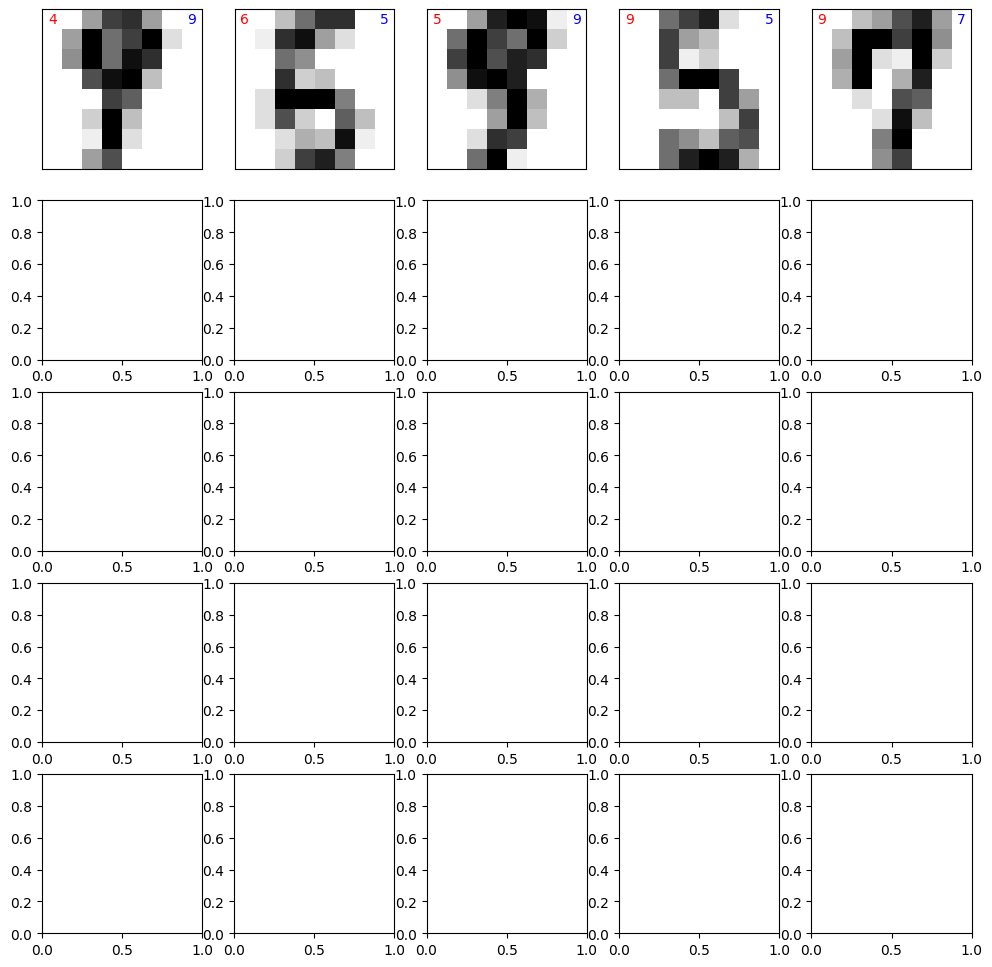

In [43]:
#el valor predicho y original son distintos
mostrar_resultados(digits, knn, nx=5, ny=5, label="incorrectos")

Cuando el valor predicho y original son distintos , ¿Por qué ocurren estas fallas?

Estas fallas se pueden dar pues dado el modelo, este es el pequeño error que se tiene, puede ser por que las imagenes se asemejan mucho a otros numeros visualmente como el $6$ y el $5$ o el $4$ y el $9$, ademas estas muestras son escritas a mano, hasta el ojo humano podria confundirse.

### Ejercicio 6
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

En conclusion, **el mejor modelo es K-Nearest Neighbors (KNN)**, con **una exactitud (Accuracy) del $98\%$** y un **tiempo de entrenamiento de $0.018543$ segundos**, con errores tan pequeños que hasta para el ojo humano es aceptable.

Aun asi, sigue sin tener un $100\%$ de exactitud, por tanto **aun hay una diferencia** entre el ojo humano y la deteccion de una modelo entrenado, en un futuro se espera alcanzar este porcentaje, **mejorando modelos** o teniendo mejores datos o visualizaciones para el dataset.